# Python for Machine Learning

### *Session \#3*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Logistic Regression

### Warm Ups

*Type the given code into the cell below*

---

In [63]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.target import ClassBalance

from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

df = pd.read_excel('titanic.xlsx').dropna()

**Split into data sets**: 
```python
X = df[['pclass', 'age', 'fare', 'adult_male']]
y = df['survived']
X_train, x_test, y_train, y_test = train_test_split(X, y)
```

In [10]:
X = df[['pclass', 'age', 'fare', 'adult_male']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Create and fit classifier**: 
```python
model = LogisticRegressionCV(cv=10)
model.fit(X_train, y_train)
```

**Use model to classify**: `model.predict(X_test)`

In [18]:
model = LogisticRegressionCV(cv=10)
model.fit(X_train, y_train)


model.predict([[1, 30, 60, 1]])



array([0])

**Use model to get probabilities**: `model.predict_proba(X_test)`

**Test accuracy of your model:** `model.score(X_test, y_test)`

### Exercises
---

**1. Train a logistic classifier on all the numeric columns. What is the accuracy of the model?**

In [22]:
data = df.select_dtypes(['int64', "float64"])
X = data.drop('survived', axis="columns")
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LogisticRegressionCV(cv=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6521739130434783

**2. What are the most important features to determining survival?**

Hint: Use model.coef_ to see the coefficients of the model

In [30]:
print(X.columns)



dict(zip(X.columns, model.coef_[0]))

Index(['pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


{'pclass': -0.41888905678804,
 'age': -0.045682560583021045,
 'sibsp': -0.10675783178118972,
 'parch': -0.33957086241056744,
 'fare': 0.006178478812407294}

**3. Let's say you bought a second-class ticket for 30 dollars. What is your probability of survival?**

In [44]:
model.predict_proba([[2, 30, 1, 2, 30]])

second_class = (df['pclass'] == 2)
around_30 = (df['fare'] >= 12) & (df['fare'] <= 20)

df[second_class & around_30]['survived'].mean()

0.8333333333333334

**4. Use one-hot encoding to add the other columns to your model. What is your accuracy now?**

Hint: Use `make_column_transformer` to separate categorical and numeric data

In [55]:
X = df.drop(['survived', 'alive'], axis="columns")
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

numeric = X.select_dtypes(['float64', 'int64']).columns
categorical = X.select_dtypes(['object', 'bool']).columns

preprocess = make_column_transformer(
                (OneHotEncoder(), categorical),
                (StandardScaler(), numeric)
            )

model = make_pipeline(preprocess, LogisticRegressionCV(cv=10, random_state=0))

model.fit(X_train, y_train)
model.score(X_test, y_test)

/Users/n/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/n/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/n/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/n/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/n/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

0.6304347826086957

## II. Evaluating Classifiers

### Warm Ups

*Type the given code into the cell below*

---
**Create confusion matrix:** 
```python
model = ConfusionMatrix(model)
model.score(X_test, y_test)
```

/Users/n/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.6304347826086957

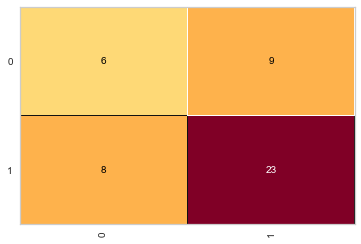

In [56]:
model = ConfusionMatrix(model)
model.score(X_test, y_test)

**Plot class prediction error:**
```
model = ClassPredictionError(model)
model.score(X_test, y_test)
```                    

0.6304347826086957

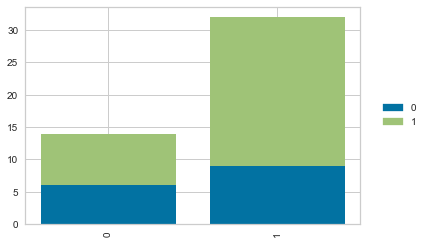

In [57]:
model = ClassPredictionError(model)
model.score(X_test, y_test)

**Plot ROC curve:** 
```python
model = ROCAUC(model)
model.score(X_test, y_test)
```

0.7514660654410914

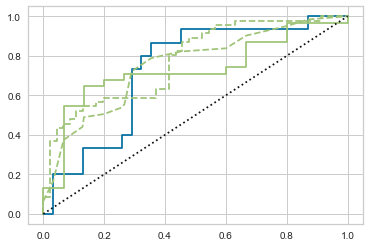

In [58]:
model = ROCAUC(model)
model.score(X_test, y_test)

### Exercises
---

**1. Plot the confusion matrix. What is more common -- false positives or false negatives?**

**2. Plot the class prediction error. Which class has a higher rate of error?**

**3. Create an ROC curve for the model. Is the model closer to an ideal model or random chance?**

## III. Class Imbalance

### Warm Ups

*Type the given code into the cell below*

---

**Plot the class balance**: 
```python
viz = ClassBalance()
viz.fit(y)
```

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c25a1e4e0>,
             colormap=None, colors=None, labels=None)

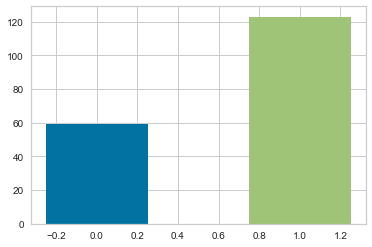

In [64]:
viz = ClassBalance()
viz.fit(y)

**Plot precision-recall curve:**
```
model = PrecisionRecallCurve(LogisticRegressionCV(cv=10))
model.fit(X_train, y_train)
model.score(X_test, y_test)
```                    

In [ ]:
model = make_pipeline(preprocess, PrecisionRecallCurve(LogisticRegressionCV(cv=10)))
model.fit(X_train, y_train)
model.score(X_test, y_test)

**Create a balanced model:** 
```python
model = make_pipeline(RandomOverSampler(), LogisticRegressionCV(cv=10))
```

### Exercises
---

**1. Make a ClassBalance visualization. Which class is overrepresented in this dataset?**

In [ ]:
viz = ClassBalance()
viz.fit(y)

**2. Plot a precision-recall curve of this imbalanced dataset. How does this graph compare to the ROC curve?**

In [ ]:
model = make_pipeline(preprocess, PrecisionRecallCurve(LogisticRegressionCV(cv=10)))
model.fit(X_train, y_train)
model.score(X_test, y_test)

**3. Create a new model that uses RandomOverSampler() as part of the pipeline**

In [ ]:
model = make_pipeline(preprocess, RandomOverSampler(), LogisticRegressionCV(cv=10))

model.fit(X_train, y_train)
model.score(X_test, y_test)